In [36]:
import pixiedust
pixiedust.optOut()

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import numpy as np

Pixiedust will not collect anonymous install statistics.


In [6]:
iou_path = "./output/analytics/2021-08-08T111509/iou.csv"
data_path = "./data/aia_171_2012-2016_256/train"

iou_df = pd.read_csv(iou_path)
iou_df.head()

,image,iou,n_hek_events,n_predicted_events
0,2015-06-01T120000__171.jpeg,0.167756,7,15
1,2014-03-13T000000__171.jpeg,0.112440,9,29
2,2015-08-15T180000__171.jpeg,0.110325,4,20
3,2013-04-01T180000__171.jpeg,0.095264,9,39
4,2015-12-25T120000__171.jpeg,0.179039,4,21


In [12]:
iou_df.describe()

,iou,n_hek_events,n_predicted_events
count,6686.000000,6686.000000,6686.000000
mean,0.150403,6.524678,24.023631
std,0.071954,2.145473,8.007273
min,0.000000,0.000000,0.000000
25%,0.100839,5.000000,19.000000
50%,0.137470,6.000000,24.000000
75%,0.184891,8.000000,30.000000
max,0.649562,20.000000,57.000000


In [9]:
sample_pred_path = './output/aia_171_2012-2016_256_cevae_pred/20210807-150551_cevae/predictions/predictions.txt'
pred_df = pd.read_csv(sample_pred_path, header=None, names = ["img", "score"])
pred_df = pred_df.sort_values(by=['score'], ascending=False)
pred_df.rename(columns={'img': 'image'}, inplace=True)
pred_df.head(10)

,image,score
71,2012-01-18T180000__171.jpeg,0.162665
428,2012-04-18T180000__171.jpeg,0.154147
3563,2014-07-09T180000__171.jpeg,0.143576
43,2012-01-11T180000__171.jpeg,0.139146
6849,2016-10-26T180000__171.jpeg,0.110176
1714,2013-03-11T120000__171.jpeg,0.087374
2533,2013-10-09T180000__171.jpeg,0.085628
4994,2015-07-08T180000__171.jpeg,0.082796
2980,2014-02-12T180000__171.jpeg,0.082507
1969,2013-05-16T180000__171.jpeg,0.081752


In [21]:
result_df = pd.merge(iou_df, pred_df, on=["image"])
date_format = '%Y-%m-%dT%H%M%S'

def get_timestamp(row):
    img_name = row["image"]
    timestamp_str = img_name.split("__")[0]
    timestamp = dt.datetime.strptime(timestamp_str, date_format)
    return timestamp
    
result_df["timestamp"] = result_df.apply(lambda row: get_timestamp(row), axis=1)
result_df = result_df.set_index('timestamp')

result_df.head()

,image,iou,n_hek_events,n_predicted_events,score
timestamp,,,,,
2015-06-01 12:00:00,2015-06-01T120000__171.jpeg,0.167756,7,15,0.059402
2014-03-13 00:00:00,2014-03-13T000000__171.jpeg,0.112440,9,29,0.071724
2015-08-15 18:00:00,2015-08-15T180000__171.jpeg,0.110325,4,20,0.046801
2013-04-01 18:00:00,2013-04-01T180000__171.jpeg,0.095264,9,39,0.061797
2015-12-25 12:00:00,2015-12-25T120000__171.jpeg,0.179039,4,21,0.054554


In [22]:
result_df.describe()

,iou,n_hek_events,n_predicted_events,score
count,6686.000000,6686.000000,6686.000000,6686.000000
mean,0.150403,6.524678,24.023631,0.057392
std,0.071954,2.145473,8.007273,0.010655
min,0.000000,0.000000,0.000000,0.000000
25%,0.100839,5.000000,19.000000,0.051967
50%,0.137470,6.000000,24.000000,0.058838
75%,0.184891,8.000000,30.000000,0.064660
max,0.649562,20.000000,57.000000,0.162665


In [23]:
sns.set(rc={'figure.figsize':(11, 4)})

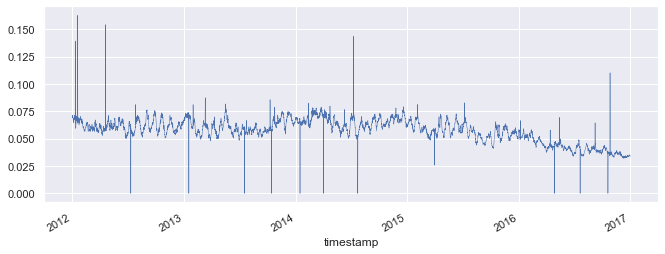

In [24]:
result_df['score'].plot(linewidth=0.5);

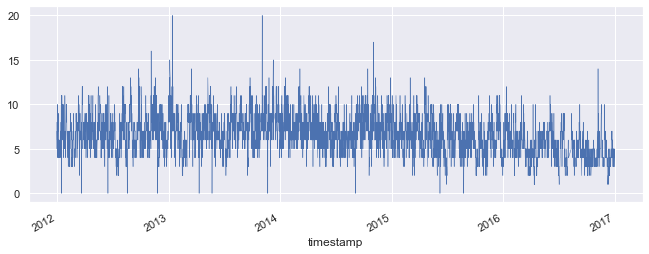

In [25]:
result_df['n_hek_events'].plot(linewidth=0.5);

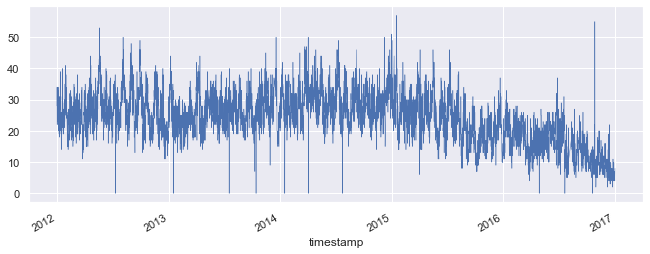

In [26]:
result_df['n_predicted_events'].plot(linewidth=0.5);

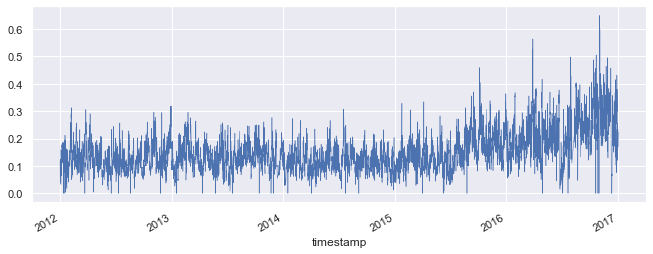

In [27]:
result_df['iou'].plot(linewidth=0.5);

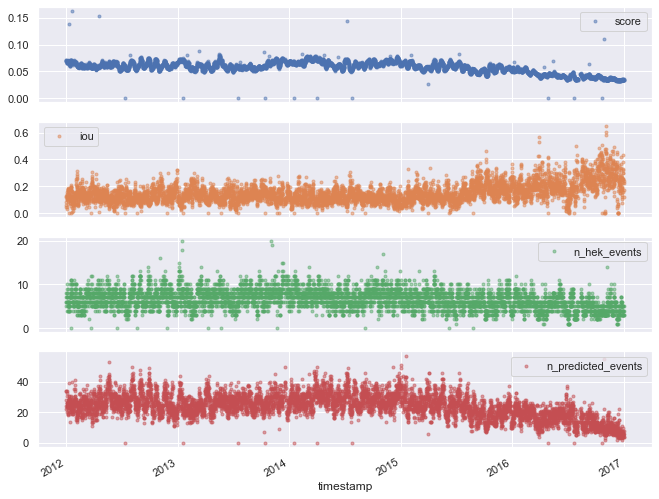

In [28]:
cols_plot = ['score', 'iou', 'n_hek_events', 'n_predicted_events']
axes = result_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

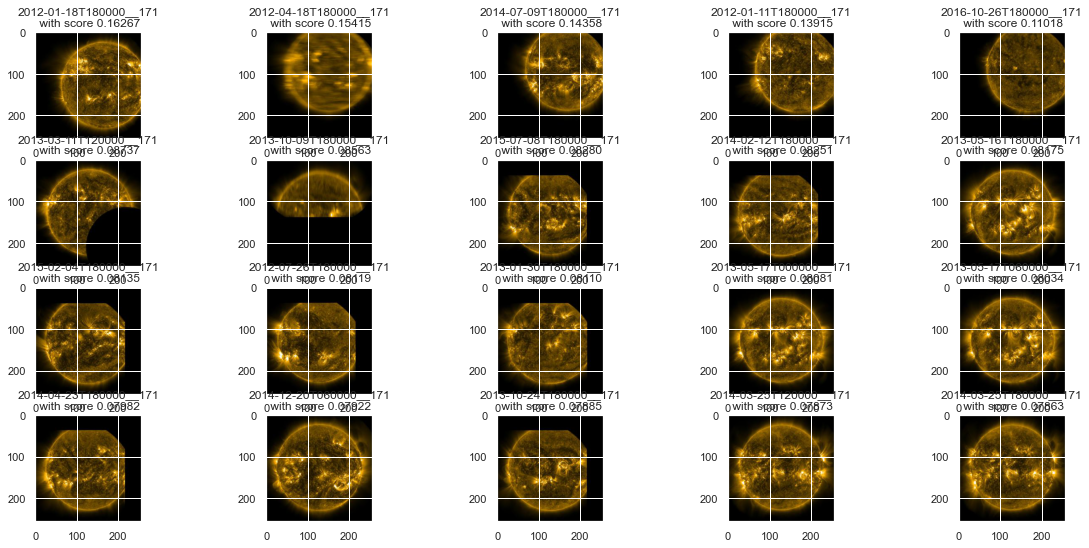

In [40]:
f, axarr = plt.subplots(4,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in result_df.sort_values(by=['score'], ascending=False).head(20).iterrows():
    img_path = Path(data_path) / row["image"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["image"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

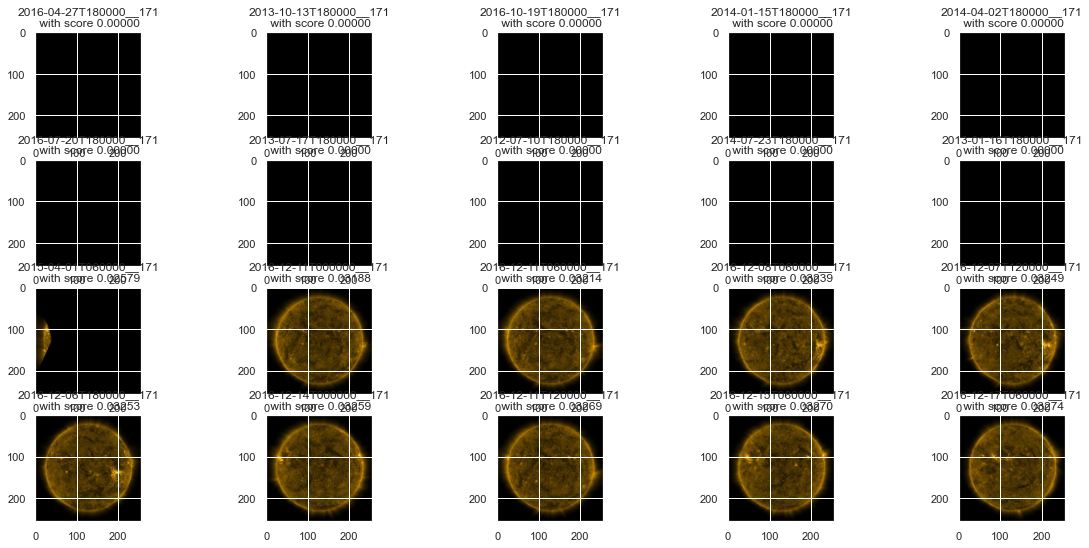

In [41]:
f, axarr = plt.subplots(4,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in result_df.sort_values(by=['score'], ascending=True).head(20).iterrows():
    img_path = Path(data_path) / row["image"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["image"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 

- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/goes_xrs_example.html#sphx-glr-generated-gallery-acquiring-data-goes-xrs-example-py